In [23]:
import pandas as pd
import numpy as np


In [24]:
df = pd.read_csv("medical.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [25]:
df.shape

(1338, 7)

In [26]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [29]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [31]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [32]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [33]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [34]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [35]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [44]:
df['charges'].nunique()

1337

In [45]:
df.loc[df['charges'] == " "]

,age,sex,bmi,children,smoker,region,charges


In [46]:
df_a = df[['sex','smoker','region']]

In [47]:
df_a.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sex
male      676
female    662
Name: count, dtype: int64


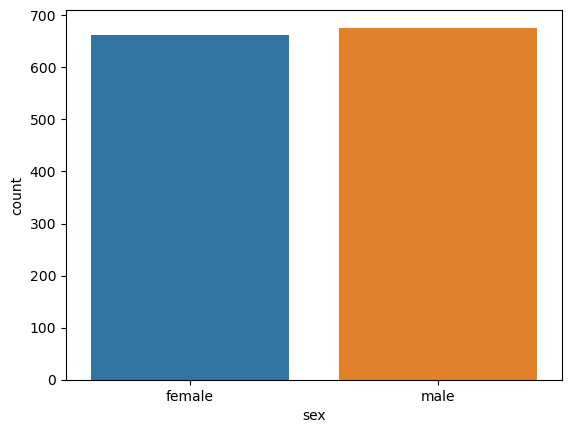

In [50]:
ax = sns.countplot(x='sex',data=df_a)
print(df_a['sex'].value_counts())

smoker
no     1064
yes     274
Name: count, dtype: int64


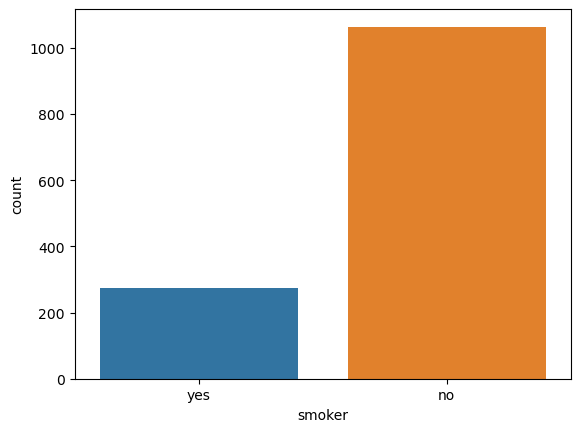

In [52]:
ax = sns.countplot(x='smoker',data=df_a)
print(df_a['smoker'].value_counts())

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


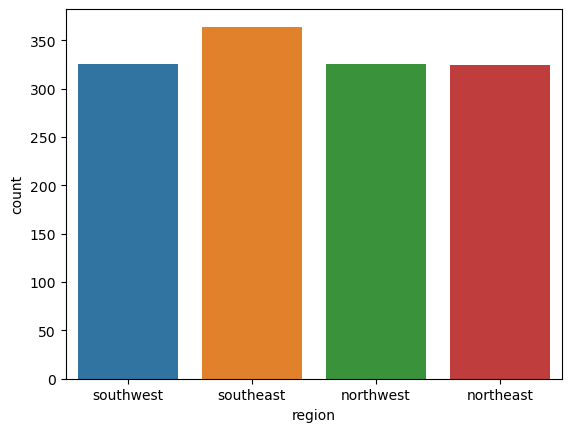

In [53]:
ax = sns.countplot(x='region',data=df_a)
print(df_a['region'].value_counts())

In [54]:
df_con = df[['age','bmi','children','charges']].copy()

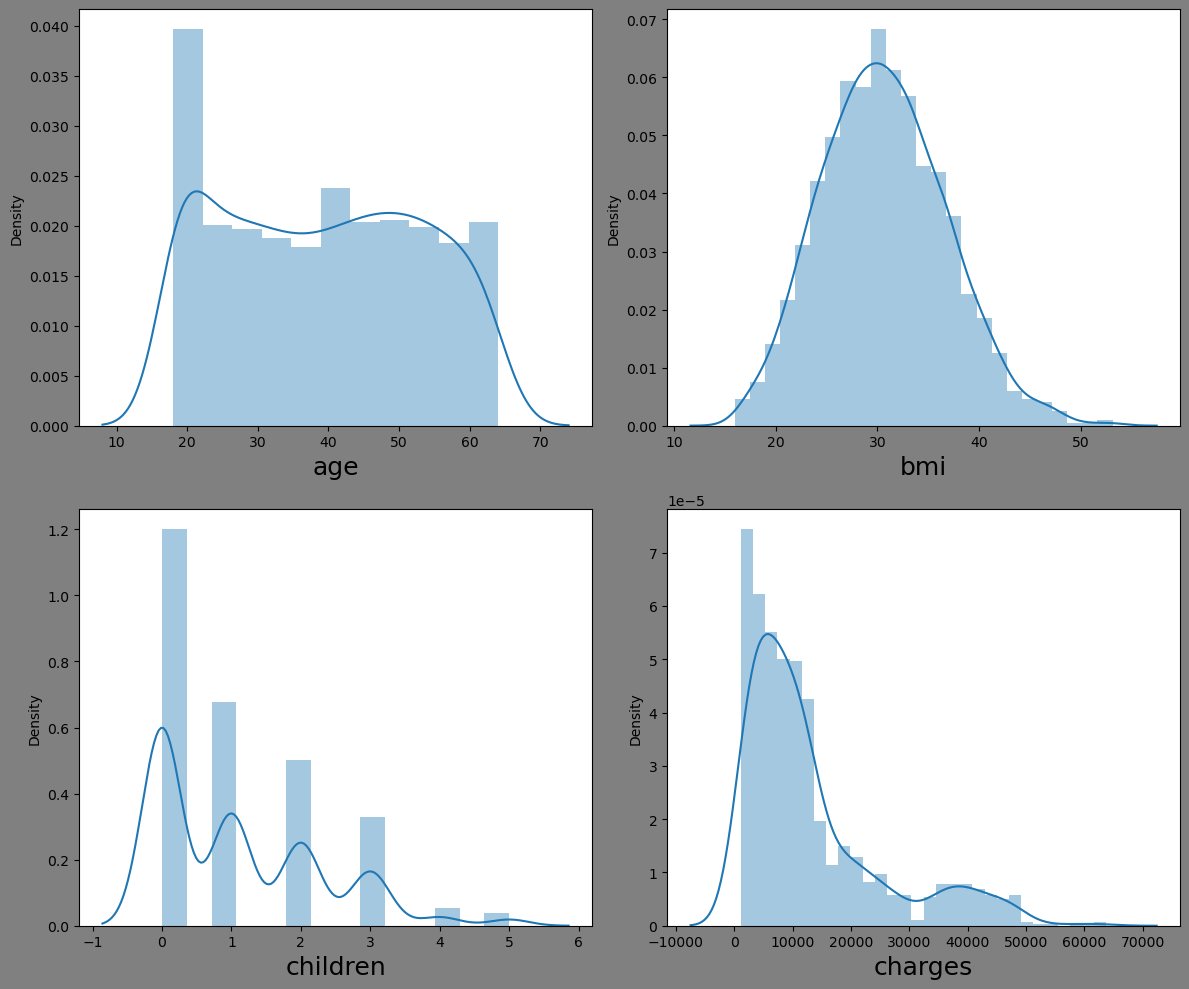

In [55]:
plt.figure(figsize=(12,10), facecolor='grey')
plotnumber=1

for col in df_con:
    if plotnumber<=4:
        axes = plt.subplot(2,2,plotnumber)
        sns.distplot(df_con[col])
        plt.xlabel(col,fontsize=18)

    plotnumber+=1
plt.tight_layout()

In [56]:
from sklearn.preprocessing import OrdinalEncoder

In [57]:
en = OrdinalEncoder()

In [60]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = en.fit_transform(df[i].values.reshape(-1,1))

In [61]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [62]:
df['region'].unique()

array([3., 2., 1., 0.])

In [63]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


<Axes: >

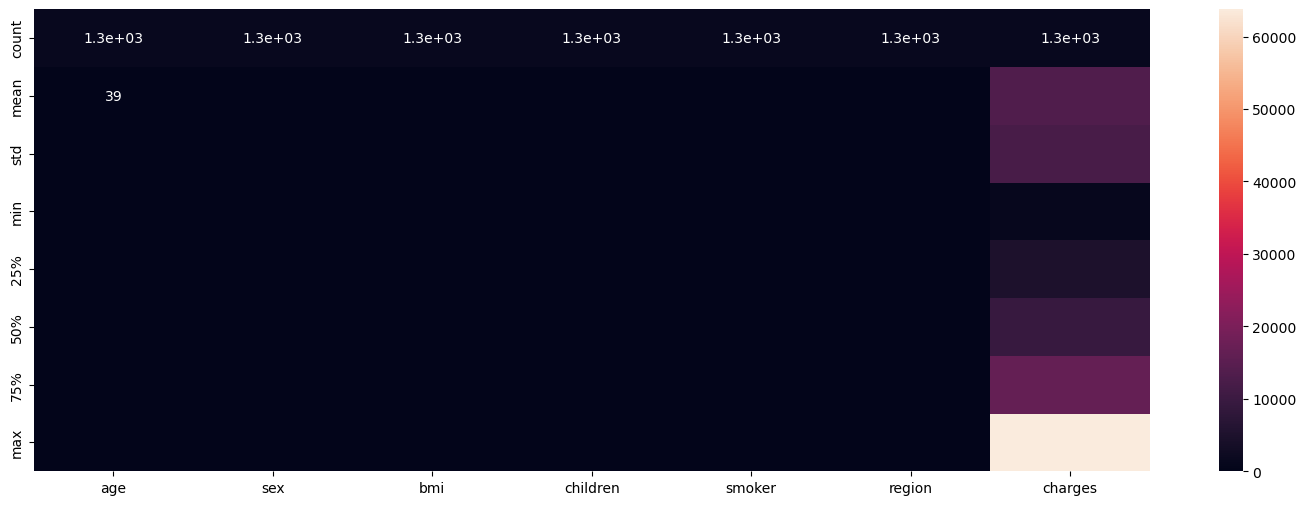

In [64]:
plt.figure(figsize=(18,6))
sns.heatmap(df.describe(),annot=True)

In [65]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

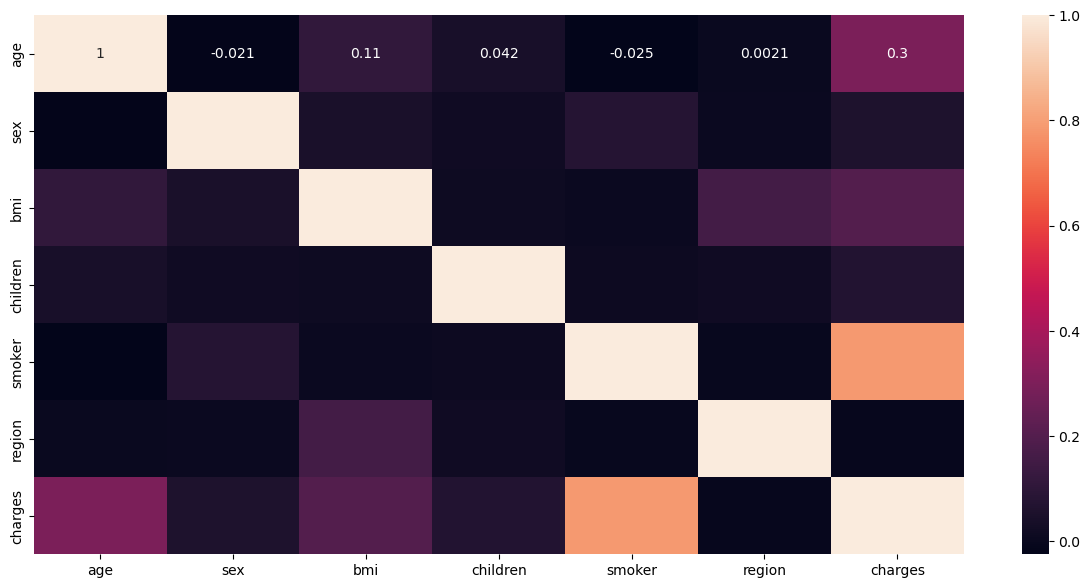

In [66]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

In [67]:
x = df.drop(columns=['charges'])
y = df['charges']

In [68]:
x

,age,sex,bmi,children,smoker,region
0,19,0.0,27.900,0,1.0,3.0
1,18,1.0,33.770,1,0.0,2.0
2,28,1.0,33.000,3,0.0,2.0
3,33,1.0,22.705,0,0.0,1.0
4,32,1.0,28.880,0,0.0,1.0
...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0
1334,18,0.0,31.920,0,0.0,0.0
1335,18,0.0,36.850,0,0.0,2.0
1336,21,0.0,25.800,0,0.0,3.0


In [69]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

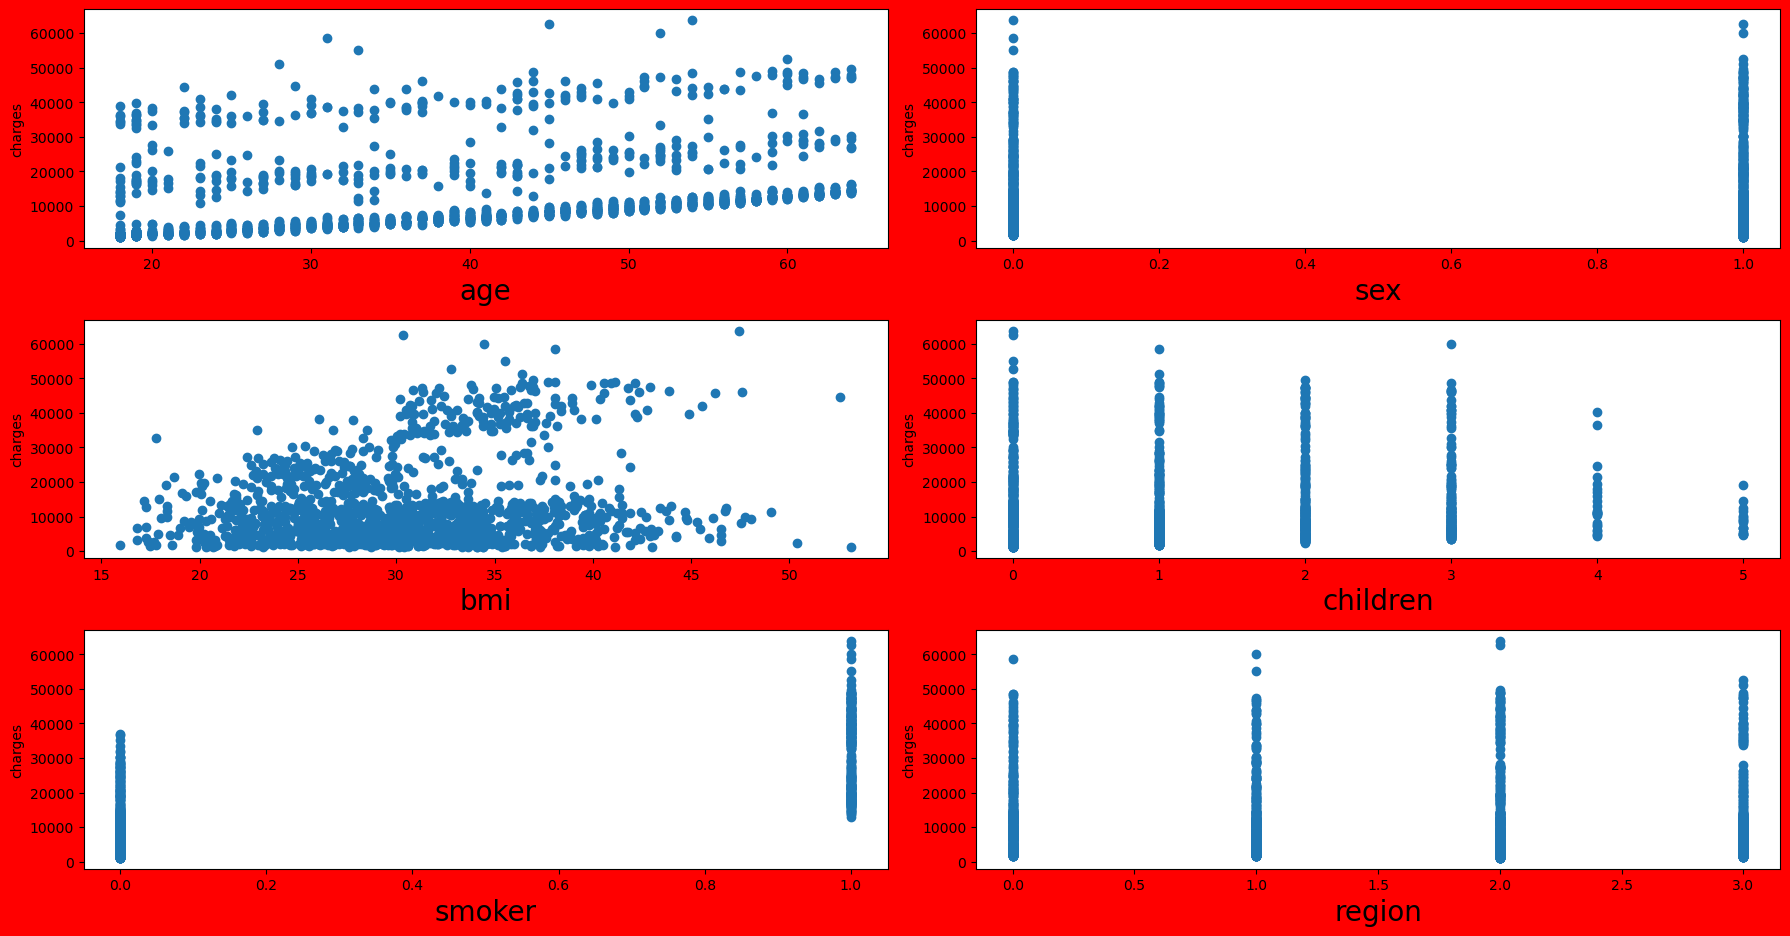

In [70]:
plt.figure(figsize=(18,12), facecolor = 'red')
plotnumber = 1

for col in x:
    if plotnumber <=7:
        axes=plt.subplot(4,2,plotnumber)
        plt.scatter(x[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('charges',fontsize=10)
    plotnumber +=1
plt.tight_layout()

In [71]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

age            Axes(0.125,0.53;0.110714x0.35)
sex         Axes(0.257857,0.53;0.110714x0.35)
bmi         Axes(0.390714,0.53;0.110714x0.35)
children    Axes(0.523571,0.53;0.110714x0.35)
smoker      Axes(0.656429,0.53;0.110714x0.35)
region      Axes(0.789286,0.53;0.110714x0.35)
charges        Axes(0.125,0.11;0.110714x0.35)
dtype: object

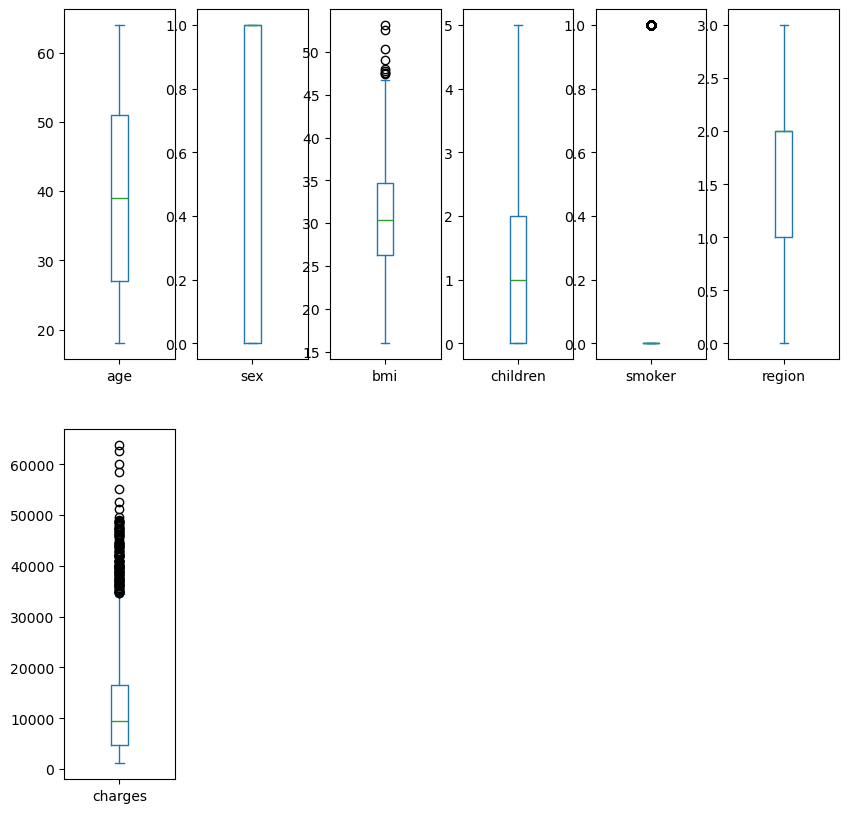

In [72]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

In [73]:
df.shape

(1338, 7)

In [74]:
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2], dtype=int64))

In [75]:
df_new = df[(z<3).all(axis=1)]
df_new

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [76]:
df_new.shape

(1309, 7)

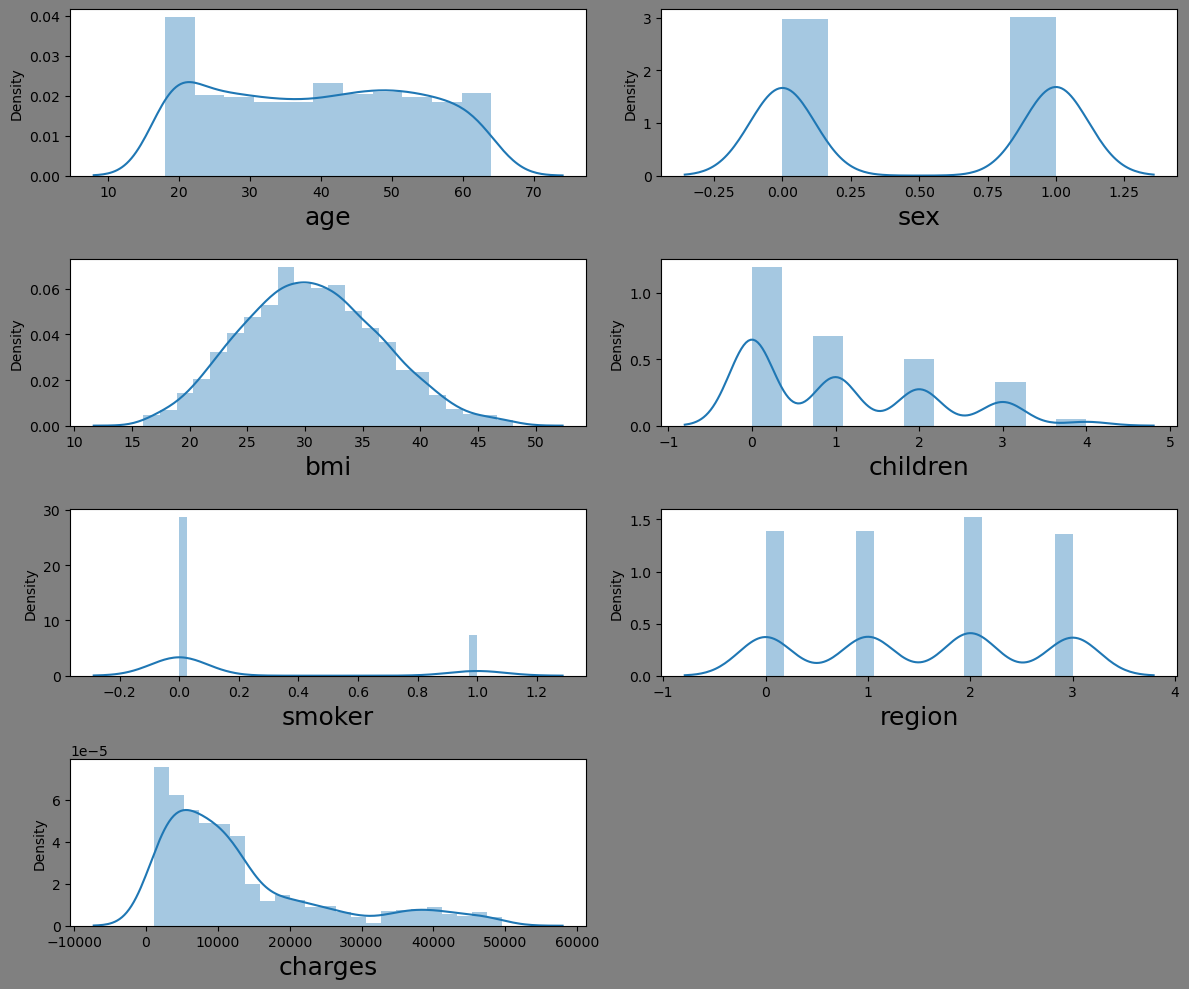

In [77]:
plt.figure(figsize=(12,10), facecolor='grey')
plotnumber=1

for col in df_new:
    if plotnumber<=7:
        axes = plt.subplot(4,2,plotnumber)
        sns.distplot(df_new[col])
        plt.xlabel(col,fontsize=18)

    plotnumber+=1
plt.tight_layout()

In [78]:
df_new.skew()

age         0.051340
sex        -0.010708
bmi         0.191432
children    0.738119
smoker      1.482731
region     -0.023027
charges     1.437160
dtype: float64

In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=15)


In [120]:
x_train.shape

(1070, 6)

In [121]:
x_test.shape

(268, 6)

In [122]:
y_train.shape

(1070,)

In [123]:
y_test.shape

(268,)

In [124]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [125]:
lr.score(x_train,y_train)

0.7453571898194261

In [133]:
lr.coef_

array([  262.46750157,    39.10830766,   332.83680592,   611.41232579,
       23842.62495538,  -356.48064676])

In [134]:
lr.intercept_

-12148.873762299521

In [137]:
pred = lr.predict(x_train)
pred_test = lr.predict(x_test)

In [138]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(r2_score(y_test,pred_test))

0.7708744759820261


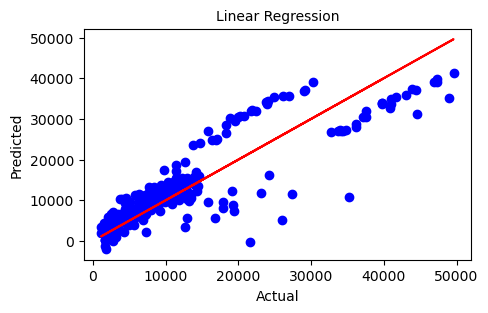

In [139]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.scatter(x=y_test, y =pred_test, color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual',fontsize=10)
plt.ylabel('Predicted',fontsize=10)
plt.title('Linear Regression',fontsize=10)
plt.savefig('lr.png')
plt.show()

In [140]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_dt = dt.predict(x_test)

rfs = r2_score(y_test,pred_dt)
print('R2_score: ',rfs*100)

dfscore = cross_val_score(dt,x,y,cv=5)
dfs = dfscore.mean()
print('Cross_Val_Score: ',dfs*100)

R2_score:  71.9036270002301
Cross_Val_Score:  69.60998369022482


In [142]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf = rf.predict(x_test)

rfs = r2_score(y_test,pred_rf)
print('R2_score: ',rfs*100)

dfscore = cross_val_score(rf,x,y,cv=5)
dfs = dfscore.mean()
print('Cross_Val_Score: ',dfs*100)

R2_score:  85.31272997445069
Cross_Val_Score:  83.4602465112355


In [143]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_svr = svr.predict(x_test)

rfs = r2_score(y_test,pred_svr)
print('R2_score: ',rfs*100)

dfscore = cross_val_score(svr,x,y,cv=5)
dfs = dfscore.mean()
print('Cross_Val_Score: ',dfs*100)

R2_score:  -4.664066846742521
Cross_Val_Score:  -10.36290178442953


In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

para = {'criterion':['squared_error','absolute_error'],
        'n_estimators':[100,200,300,400,500]
       }
rf = RandomForestRegressor()
cl = GridSearchCV(rf,para)
cl.fit(x_train,y_train)

print(cl.best_params_)

{'criterion': 'squared_error', 'n_estimators': 400}


In [153]:
rf = RandomForestRegressor(criterion='squared_error',n_estimators=400)

rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_de = rf.predict(x_test)

rfs = r2_score(y_test,pred_de)
print('R2_score: ',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross_Val_score: ',rfc*100)

R2_score:  84.69282493334347
Cross_Val_score:  83.56999209064078


In [154]:
import pickle
filename = 'Medical.pkl'
pickle.dump(rf,open(filename,'wb'))

In [156]:
loaded_model = pickle.load(open('Medical.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

84.69282493334347


In [157]:
con = pd.DataFrame([loaded_model.predict(x_test)[:],pred_de[:]],index=['Predicted','Original'])

In [158]:
con

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
Predicted,43157.019757,17952.107291,3171.217111,2782.592934,2147.959127,6512.340413,6263.752453,43152.00009,6598.833548,9678.454548,...,2736.289191,5348.424895,4367.062831,47667.437472,11502.919819,5955.367595,6607.315699,14221.639842,3002.126479,13677.835817
Original,43157.019757,17952.107291,3171.217111,2782.592934,2147.959127,6512.340413,6263.752453,43152.00009,6598.833548,9678.454548,...,2736.289191,5348.424895,4367.062831,47667.437472,11502.919819,5955.367595,6607.315699,14221.639842,3002.126479,13677.835817
